(360, 480, 3) (360, 480, 3)
data-blobs: (1, 3, 360, 480)
*******************************
data-blobs_b: (1, 3, 360, 480)
conv-blobs_b: (1, 3, 96, 96)
weight-blobs_b: (3, 3, 5, 5)
bias-blobs_b: (3,)
bias-blobs_b: [ 0.  0.  0.]
data-blobs_f: (1, 3, 360, 480)
conv-blobs_f: (1, 3, 356, 476)
weight-blobs_f: (3, 3, 5, 5)
bias-blobs_f: (3,)
bias-blobs_f: [ 0.  0.  0.]
*******************************
*******************************


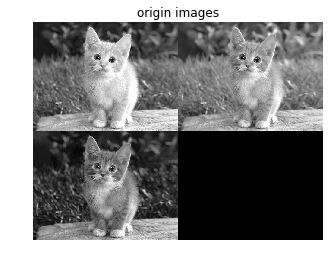

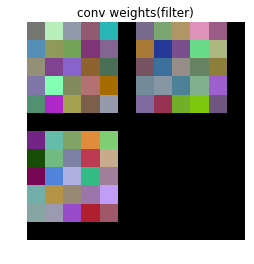

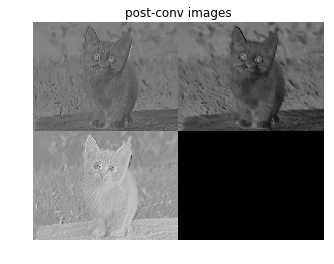

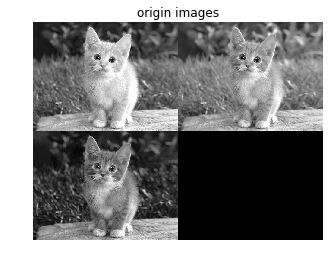

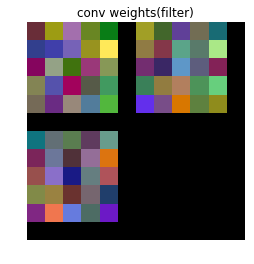

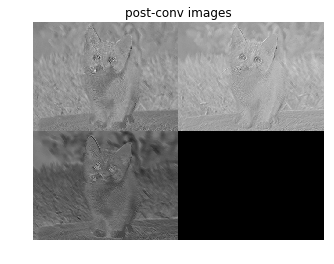

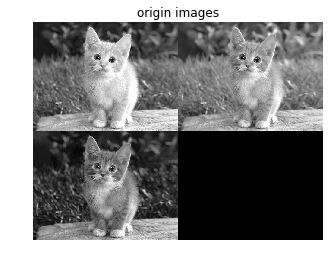

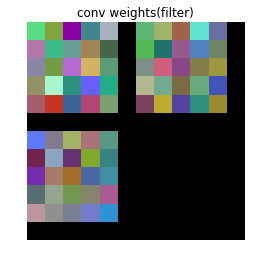

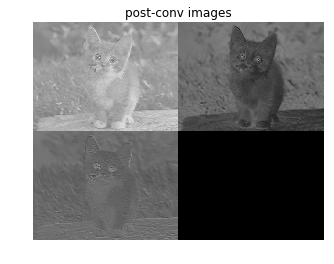

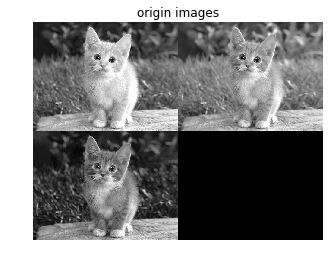

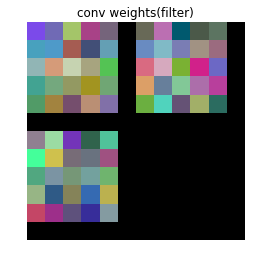

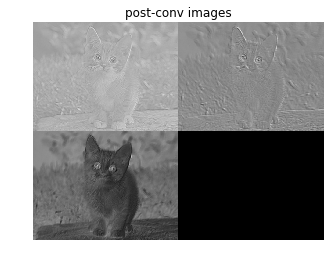

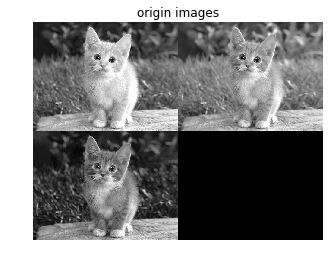

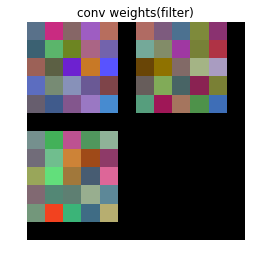

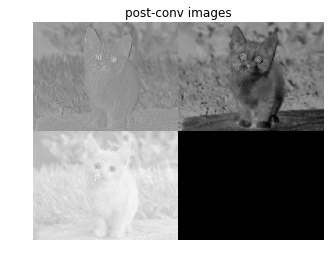

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os, cv2

caffe_root = '/home/heyanguang/caffecode/caffe/'
sys.path.insert(0, caffe_root + 'python')
os.chdir(caffe_root)
import caffe

im = caffe.io.load_image('examples/images/cat.jpg')
cvim = cv2.imread('examples/images/cat.jpg')
print im.shape, cvim.shape
# print 'im', im
# print 'cvim', cvim
# plt.imshow(im)
# plt.axis('off')

net = caffe.Net('examples/net_surgery/conv.prototxt', caffe.TEST)
im_input = im[np.newaxis, :, :, :].transpose(0, 3, 1, 2)
print "data-blobs:", im_input.shape
net.blobs['data'].reshape(*im_input.shape)
net.blobs['data'].data[...] = im_input
# plt.imshow(net.blobs['data'].data[0].transpose(1, 2, 0))
# plt.title("origin images")
# plt.axis('off')

plt.rcParams['image.cmap'] = 'gray'

def show_data(data, head, padsize = 1, padval = 0):
    data -= data.min()
    data /= data.max()

    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
#     print 'n', n
    padding = ((0, n ** 2 - data.shape[0]), (0, padsize), (0, padsize)) + ((0, 0),) * (data.ndim - 3)
#     print 'padding', padding
#     print 'data.shape0', data.shape
    data = np.pad(data, padding, mode = 'constant', constant_values = (padval, padval))

    # tile the filters into an image
#     print 'data.shape1', data.shape
#     print 'data.shape[1:]', data.shape[1:]
    ndim = data.ndim
    data = data.reshape((n, n) + data.shape[1:])
#     print 'data.shape2', data.shape
#     print 'ndim', ndim

#     print 'kk', (0, 2, 1, 3) + tuple(range(4, ndim + 1)), tuple(range(4, ndim + 1))
    data = data.transpose((0, 2, 1, 3) + tuple(range(4, ndim + 1)))
#     print 'data.shape3', data.shape

#     print 'data.shape[4:]', data.shape[4:]
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
#     print 'data.shape4', data.shape
    plt.figure()
    plt.title(head)
    plt.imshow(data)
    plt.axis('off')
    print '*******************************'

show_data(net.blobs['data'].data[0], 'origin images')
print "data-blobs_b:", net.blobs['data'].data.shape
print "conv-blobs_b:", net.blobs['conv'].data.shape
print "weight-blobs_b:", net.params['conv'][0].data.shape
print "bias-blobs_b:", net.params['conv'][1].data.shape
print "bias-blobs_b:", net.params['conv'][1].data

net.forward()

print "data-blobs_f:", net.blobs['data'].data.shape
print "conv-blobs_f:", net.blobs['conv'].data.shape
print "weight-blobs_f:", net.params['conv'][0].data.shape
print "bias-blobs_f:", net.params['conv'][1].data.shape
print "bias-blobs_f:", net.params['conv'][1].data
show_data(net.params['conv'][0].data.transpose(0, 2, 3, 1), 'conv weights(filter)')
show_data(net.blobs['conv'].data[0], 'post-conv images')


plt.show()



